<a href="https://colab.research.google.com/github/changsin/FSDL/blob/main/plate_recognizer/notebooks/ufpr_data_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFPR license plate dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/changsin/FSDL

Cloning into 'FSDL'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 795 (delta 19), reused 11 (delta 10), pack-reused 768
Receiving objects: 100% (795/795), 100.53 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (511/511), done.


In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("plate_recognizer") is None:
    import sys
    sys.path.append('..')

In [73]:
from FSDL.plate_recognizer.data.kaggle_data import KaggleData
from FSDL.plate_recognizer.data.cluster import Cluster

DATA_ROOT = "./drive/MyDrive/data/UFPR_YOLO/"

ufpr_data = KaggleData(X_path=DATA_ROOT+"images/train/", Y_path=DATA_ROOT+"labels/annotations_train.json")
ufpr_data.prepare_data()
ufpr_data.cluster_data(unique=False)
ufpr_data.partition_on_clusters()
ufpr_data.X.shape

(1800, 224, 224, 3)

## Save annotation files -one time
This is a one time loading and saving of annotation files to save time. After the files are loaded into Y_raw, it was serialized into json file. Later this file can be just loaded and deserialized which is much faster. 

In [14]:
IMAGE_SIZE = 224
Y_raw = ufpr_data.load_labels(DATA_ROOT+"labels/annotations_train.json")
Y_raw = [[int(e*IMAGE_SIZE) for e in y] for y in Y_raw]
ufpr_data.to_json(DATA_ROOT+"labels/annotations_train.json", Y_raw)

In [20]:
ufpr_data.test_idx

{0: array([ 749, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059,
        1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070,
        1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1140, 1141,
        1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152,
        1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163,
        1164, 1165, 1166, 1167, 1168, 1169, 1230, 1231, 1232, 1233, 1234,
        1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245,
        1246, 1247, 1248, 1249]),
 1: array([1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546,
        1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557,
        1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568,
        1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579,
        1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590,
        1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601

## Plot clusters

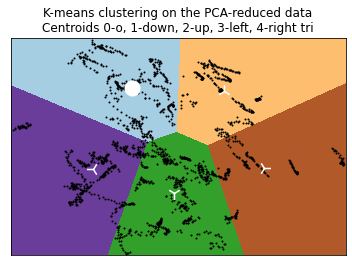

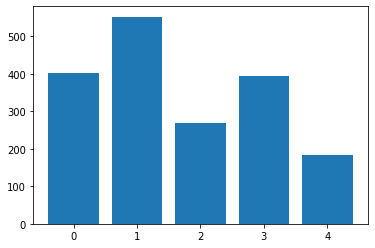

In [74]:
import FSDL.plate_recognizer.utils.plots as plots

K = 5

plots.plot_pca_clusters(ufpr_data.X_pca_reduced, ufpr_data.kmeans_pca)
plots.plot_cluster_histogram(ufpr_data.X_pca_clusters, K)

### Plot test data

#### Without suffling

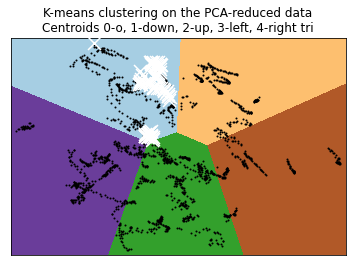

In [22]:
import FSDL.plate_recognizer.utils.plots as plots

plots.plot_data_in_clusters(ufpr_data.X_pca_reduced, ufpr_data.kmeans_pca, ufpr_data.test_idx[0])

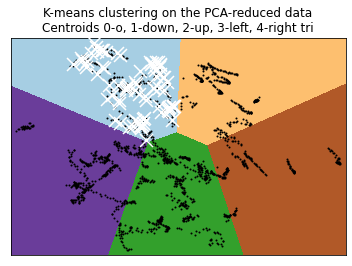

In [75]:
plots.plot_data_in_clusters(ufpr_data.X_pca_reduced, ufpr_data.kmeans_pca, ufpr_data.test_idx[0])

2021-06-09 03:18:25,646 - FSDL.plate_recognizer.data.cluster - INFO - cluster.py:104 - Found 1248 duplicates


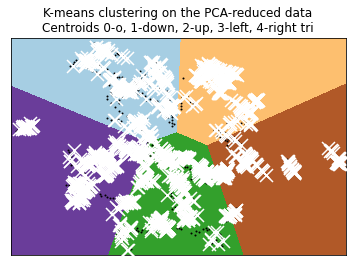

In [76]:
to_remove_idx = Cluster.find_duplicates(ufpr_data.X_pca_reduced)
plots.plot_data_in_clusters(ufpr_data.X_pca_reduced, ufpr_data.kmeans_pca, to_remove_idx)

In [36]:
list(to_remove_idx)[20]

22

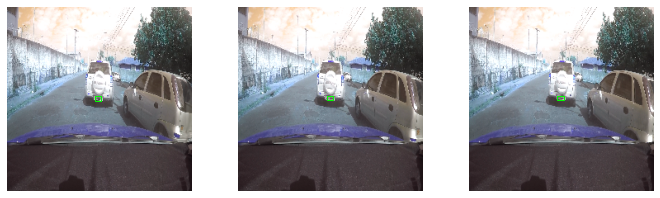

In [38]:
plots.plot_images([ufpr_data.X[0], ufpr_data.X[1], ufpr_data.X[2]], [ufpr_data.Y[0], ufpr_data.Y[1], ufpr_data.Y[2]])

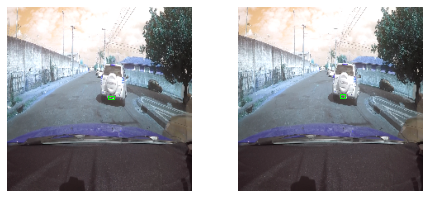

In [37]:
plots.plot_images([ufpr_data.X[20], ufpr_data.X[21]], [ufpr_data.Y[20], ufpr_data.Y[21]])

# Remove duplicate data points

In [54]:
from FSDL.plate_recognizer.data.kaggle_data import KaggleData
from FSDL.plate_recognizer.data.cluster import Cluster

DATA_ROOT = "./drive/MyDrive/data/UFPR_YOLO/"

ufpr_data_uniq = KaggleData(X_path=DATA_ROOT+"images/train/", Y_path=DATA_ROOT+"labels/annotations_train.json")
ufpr_data_uniq.prepare_data()
ufpr_data_uniq.cluster_data(unique=True)
ufpr_data_uniq.X.shape

2021-06-09 02:49:43,355 - FSDL.plate_recognizer.data.cluster - INFO - cluster.py:104 - Found 1248 duplicates
2021-06-09 02:49:43,357 - FSDL.plate_recognizer.data.kaggle_data - INFO - kaggle_data.py:88 - Removing duplicates 1248
2021-06-09 02:49:43,360 - FSDL.plate_recognizer.data.kaggle_data - INFO - kaggle_data.py:92 - Using only 552


(1800, 224, 224, 3)

In [ ]:
def calc_variances(X_pca_reduced):
  # Calculate distances of all points
  distances = cdist(X_pca_reduced, X_pca_reduced)

  # Find duplicates (very similar images)
  # dupes = np.array([np.where(distances[id] < 1) for id in range(distances.shape[0])]).reshape(-1)
  dupes = [np.array(np.where(distances[id] < 1)).reshape(-1).tolist() \
          for id in range(distances.shape[0])]

  to_remove = set()
  for d in dupes:
      if len(d) > 1:
          for id in range(1, len(d)):
              to_remove.add(d[id])
  logger.info("Found {} duplicates".format(len(to_remove)))
  return to_remove

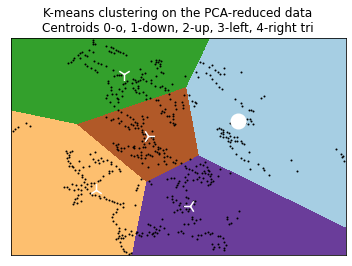

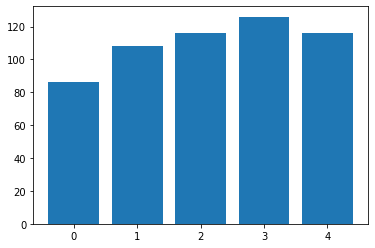

In [55]:
plots.plot_pca_clusters(ufpr_data_uniq.X_pca_reduced, ufpr_data_uniq.kmeans_pca)
plots.plot_cluster_histogram(ufpr_data_uniq.X_pca_clusters, K)

In [60]:
ufpr_data_uniq.partition_on_clusters()

### This was before shuffling the test data
You can see that it's clustered too much on a few data points so we need to shuffle.

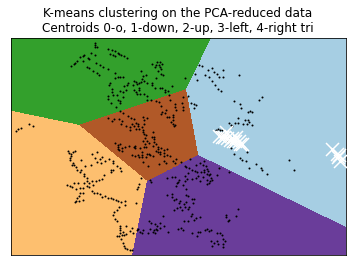

In [41]:
plots.plot_data_in_clusters(ufpr_data_uniq.X_pca_reduced,
                            ufpr_data_uniq.kmeans_pca,
                            ufpr_data_uniq.test_idx[0])

After shuffling, the data distribution looks much better.

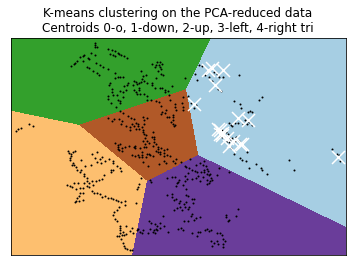

In [61]:
plots.plot_data_in_clusters(ufpr_data_uniq.X_pca_reduced,
                            ufpr_data_uniq.kmeans_pca,
                            ufpr_data_uniq.test_idx[0])

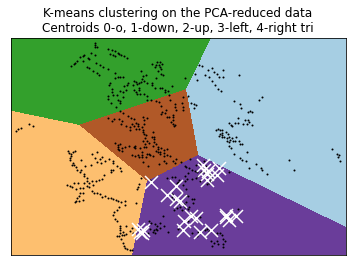

In [62]:
plots.plot_data_in_clusters(ufpr_data_uniq.X_pca_reduced,
                            ufpr_data_uniq.kmeans_pca,
                            ufpr_data_uniq.test_idx[3])

# Weights and Biases

In [70]:
!pip install wandb -qqq
import wandb
wandb.login()

True

# Train

## Train with the full dataset

In [82]:
from FSDL.plate_recognizer.data.base_data_module import DataType
from FSDL.plate_recognizer.models.plate_model import PlateModel
from FSDL.plate_recognizer.training.trainer import Trainer

plate_model = PlateModel()

X_train, Y_train = ufpr_data.get_data(data_type=DataType.Train)
model_cnn = plate_model.create_model(Y_train.shape[0])

trainer = Trainer(model_cnn, name="UFPR Trained on full dataset")
model_cnn = trainer.train(ufpr_data, epochs=50)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 4)                 516       
Total params: 17,951,364
Trainable params: 3,236,676
Non-trainable params: 14,714,688
__________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/50
81/81 [==============================] - 6s 50ms/step - loss: 0.0389 - accuracy: 0.6309 - val_loss: 0.0066 - val_accuracy: 0.7415


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 2/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0053 - accuracy: 0.7759 - val_loss: 0.0034 - val_accuracy: 0.7891


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 3/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0037 - accuracy: 0.7985 - val_loss: 0.0029 - val_accuracy: 0.7891


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 4/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0025 - accuracy: 0.8281 - val_loss: 0.0020 - val_accuracy: 0.8571


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 5/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0023 - accuracy: 0.8388 - val_loss: 0.0018 - val_accuracy: 0.8299


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 6/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0016 - accuracy: 0.8302 - val_loss: 0.0014 - val_accuracy: 0.8776


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 7/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0013 - accuracy: 0.8844 - val_loss: 0.0012 - val_accuracy: 0.8776


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 8/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0012 - accuracy: 0.8832 - val_loss: 0.0010 - val_accuracy: 0.8367


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 9/50
81/81 [==============================] - 3s 39ms/step - loss: 0.0011 - accuracy: 0.8767 - val_loss: 9.2876e-04 - val_accuracy: 0.8980


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 10/50
81/81 [==============================] - 3s 39ms/step - loss: 9.4634e-04 - accuracy: 0.9081 - val_loss: 0.0011 - val_accuracy: 0.8776


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 11/50
81/81 [==============================] - 3s 39ms/step - loss: 8.9577e-04 - accuracy: 0.8974 - val_loss: 9.7851e-04 - val_accuracy: 0.8639


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 12/50
81/81 [==============================] - 3s 39ms/step - loss: 8.0186e-04 - accuracy: 0.8995 - val_loss: 5.8200e-04 - val_accuracy: 0.8980


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 13/50
81/81 [==============================] - 3s 39ms/step - loss: 6.7940e-04 - accuracy: 0.9191 - val_loss: 6.7416e-04 - val_accuracy: 0.9048


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 14/50
81/81 [==============================] - 3s 39ms/step - loss: 6.1605e-04 - accuracy: 0.9000 - val_loss: 6.8681e-04 - val_accuracy: 0.9456


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 15/50
81/81 [==============================] - 3s 39ms/step - loss: 5.3826e-04 - accuracy: 0.9073 - val_loss: 6.3600e-04 - val_accuracy: 0.9116


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 16/50
81/81 [==============================] - 3s 39ms/step - loss: 5.6511e-04 - accuracy: 0.9191 - val_loss: 5.7285e-04 - val_accuracy: 0.9456


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 17/50
81/81 [==============================] - 3s 39ms/step - loss: 5.4269e-04 - accuracy: 0.9125 - val_loss: 5.5690e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 18/50
81/81 [==============================] - 3s 43ms/step - loss: 5.3409e-04 - accuracy: 0.9203 - val_loss: 4.2293e-04 - val_accuracy: 0.9592


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 19/50
81/81 [==============================] - 3s 39ms/step - loss: 4.3695e-04 - accuracy: 0.9067 - val_loss: 5.2324e-04 - val_accuracy: 0.9116


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 20/50
81/81 [==============================] - 3s 39ms/step - loss: 4.0336e-04 - accuracy: 0.9338 - val_loss: 4.7583e-04 - val_accuracy: 0.9320


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 21/50
81/81 [==============================] - 3s 39ms/step - loss: 4.5080e-04 - accuracy: 0.9393 - val_loss: 4.4063e-04 - val_accuracy: 0.9048


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 22/50
81/81 [==============================] - 3s 39ms/step - loss: 4.0707e-04 - accuracy: 0.9328 - val_loss: 3.7522e-04 - val_accuracy: 0.9320


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 23/50
81/81 [==============================] - 3s 39ms/step - loss: 4.0927e-04 - accuracy: 0.9458 - val_loss: 3.7369e-04 - val_accuracy: 0.9456


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 24/50
81/81 [==============================] - 3s 39ms/step - loss: 3.9260e-04 - accuracy: 0.9429 - val_loss: 3.1514e-04 - val_accuracy: 0.9252


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 25/50
81/81 [==============================] - 3s 39ms/step - loss: 3.5957e-04 - accuracy: 0.9442 - val_loss: 3.4863e-04 - val_accuracy: 0.9252


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 26/50
81/81 [==============================] - 3s 43ms/step - loss: 3.1173e-04 - accuracy: 0.9531 - val_loss: 3.5919e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 27/50
81/81 [==============================] - 3s 39ms/step - loss: 3.2660e-04 - accuracy: 0.9392 - val_loss: 3.0884e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 28/50
81/81 [==============================] - 3s 39ms/step - loss: 2.8725e-04 - accuracy: 0.9466 - val_loss: 2.6911e-04 - val_accuracy: 0.9388


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 29/50
81/81 [==============================] - 3s 39ms/step - loss: 2.5629e-04 - accuracy: 0.9407 - val_loss: 3.3360e-04 - val_accuracy: 0.9388


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 30/50
81/81 [==============================] - 3s 39ms/step - loss: 3.2425e-04 - accuracy: 0.9412 - val_loss: 3.5607e-04 - val_accuracy: 0.9048


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 31/50
81/81 [==============================] - 3s 39ms/step - loss: 2.7644e-04 - accuracy: 0.9362 - val_loss: 3.4257e-04 - val_accuracy: 0.9796


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 32/50
81/81 [==============================] - 3s 39ms/step - loss: 2.6394e-04 - accuracy: 0.9534 - val_loss: 3.0405e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 33/50
81/81 [==============================] - 3s 39ms/step - loss: 2.4602e-04 - accuracy: 0.9492 - val_loss: 2.3912e-04 - val_accuracy: 0.9456


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 34/50
81/81 [==============================] - 3s 39ms/step - loss: 2.4410e-04 - accuracy: 0.9507 - val_loss: 2.3939e-04 - val_accuracy: 0.9592


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 35/50
81/81 [==============================] - 3s 39ms/step - loss: 2.1319e-04 - accuracy: 0.9400 - val_loss: 2.3827e-04 - val_accuracy: 0.9524


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 36/50
81/81 [==============================] - 3s 39ms/step - loss: 2.1471e-04 - accuracy: 0.9543 - val_loss: 2.2686e-04 - val_accuracy: 0.9456


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 37/50
81/81 [==============================] - 3s 39ms/step - loss: 2.1661e-04 - accuracy: 0.9407 - val_loss: 1.9792e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 38/50
81/81 [==============================] - 3s 39ms/step - loss: 2.1274e-04 - accuracy: 0.9441 - val_loss: 1.8447e-04 - val_accuracy: 0.9388


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 39/50
81/81 [==============================] - 3s 39ms/step - loss: 2.0139e-04 - accuracy: 0.9385 - val_loss: 2.4673e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 40/50
81/81 [==============================] - 3s 39ms/step - loss: 1.9036e-04 - accuracy: 0.9711 - val_loss: 2.5778e-04 - val_accuracy: 0.9184


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 41/50
81/81 [==============================] - 4s 44ms/step - loss: 1.8198e-04 - accuracy: 0.9681 - val_loss: 2.2196e-04 - val_accuracy: 0.9388


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 42/50
81/81 [==============================] - 3s 39ms/step - loss: 1.6817e-04 - accuracy: 0.9537 - val_loss: 1.8709e-04 - val_accuracy: 0.9320


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 43/50
81/81 [==============================] - 3s 39ms/step - loss: 2.0802e-04 - accuracy: 0.9536 - val_loss: 1.9179e-04 - val_accuracy: 0.9388


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 44/50
81/81 [==============================] - 3s 39ms/step - loss: 1.7690e-04 - accuracy: 0.9450 - val_loss: 1.5621e-04 - val_accuracy: 0.9320


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 45/50
81/81 [==============================] - 3s 39ms/step - loss: 1.5463e-04 - accuracy: 0.9656 - val_loss: 2.2672e-04 - val_accuracy: 0.9524


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 46/50
81/81 [==============================] - 3s 39ms/step - loss: 1.7630e-04 - accuracy: 0.9473 - val_loss: 1.5916e-04 - val_accuracy: 0.9524


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 47/50
81/81 [==============================] - 3s 39ms/step - loss: 1.7119e-04 - accuracy: 0.9508 - val_loss: 1.9062e-04 - val_accuracy: 0.9660


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 48/50
81/81 [==============================] - 3s 39ms/step - loss: 1.6063e-04 - accuracy: 0.9706 - val_loss: 2.3842e-04 - val_accuracy: 0.9456


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 49/50
81/81 [==============================] - 3s 39ms/step - loss: 1.8075e-04 - accuracy: 0.9532 - val_loss: 1.9200e-04 - val_accuracy: 0.9388


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 50/50
81/81 [==============================] - 3s 39ms/step - loss: 1.5334e-04 - accuracy: 0.9575 - val_loss: 1.5581e-04 - val_accuracy: 0.9320


wandb: WARNING No validation_data set, pass a generator to the callback.


2021-06-09 03:24:50,720 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:37 - Score : 94.75%
100/100 [==============================] - 2s 13ms/step - loss: 1.6624e-04 - accuracy: 0.9558
2021-06-09 03:24:52,651 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:41 - Test results 
 Loss: 0.0001662402064539492
 Accuracy: 0.9558011293411255


ResourceExhaustedError: ignored

## Train with unique data points

With the duplicate data points removed, the model train much faster and better accuracy 78% -> 92%

In [72]:
from FSDL.plate_recognizer.data.base_data_module import DataType
from FSDL.plate_recognizer.models.plate_model import PlateModel
from FSDL.plate_recognizer.training.trainer import Trainer

plate_model_uniq = PlateModel()

X_train_uniq, Y_train_uniq = ufpr_data_uniq.get_data(data_type=DataType.Train)
model_cnn_uniq = plate_model_uniq.create_model(Y_train_uniq.shape[0])

trainer_uniq = Trainer(model_cnn_uniq, name="UFPR Trained on unique data points")
model_cnn_uniq = trainer_uniq.train(ufpr_data_uniq, epochs=50)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 4)                 516       
Total params: 17,951,364
Trainable params: 3,236,676
Non-trainable params: 14,714,688
__________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2191: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Epoch 1/50
25/25 [==============================] - 35s 175ms/step - loss: 0.0584 - accuracy: 0.5752 - val_loss: 0.0167 - val_accuracy: 0.5870


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 2/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0192 - accuracy: 0.6216 - val_loss: 0.0066 - val_accuracy: 0.6304


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 3/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0088 - accuracy: 0.6627 - val_loss: 0.0051 - val_accuracy: 0.6522


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 4/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0058 - accuracy: 0.6492 - val_loss: 0.0053 - val_accuracy: 0.6957


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 5/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0052 - accuracy: 0.6916 - val_loss: 0.0035 - val_accuracy: 0.6957


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 6/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0045 - accuracy: 0.6763 - val_loss: 0.0051 - val_accuracy: 0.8261


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 7/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0037 - accuracy: 0.7284 - val_loss: 0.0040 - val_accuracy: 0.7609


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 8/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0033 - accuracy: 0.7581 - val_loss: 0.0030 - val_accuracy: 0.6957


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 9/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0028 - accuracy: 0.7151 - val_loss: 0.0024 - val_accuracy: 0.6739


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 10/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0022 - accuracy: 0.7240 - val_loss: 0.0021 - val_accuracy: 0.6957


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 11/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0023 - accuracy: 0.7052 - val_loss: 0.0021 - val_accuracy: 0.6739


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 12/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0021 - accuracy: 0.7322 - val_loss: 0.0035 - val_accuracy: 0.6304


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 13/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0016 - accuracy: 0.7374 - val_loss: 0.0019 - val_accuracy: 0.8478


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 14/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0015 - accuracy: 0.7819 - val_loss: 0.0012 - val_accuracy: 0.7826


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 15/50
25/25 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 0.7340 - val_loss: 8.0467e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 16/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0014 - accuracy: 0.7221 - val_loss: 0.0016 - val_accuracy: 0.6957


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 17/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0013 - accuracy: 0.7874 - val_loss: 8.5870e-04 - val_accuracy: 0.7826


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 18/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 0.7706 - val_loss: 9.0114e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 19/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0010 - accuracy: 0.7812 - val_loss: 9.7961e-04 - val_accuracy: 0.8043


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 20/50
25/25 [==============================] - 1s 40ms/step - loss: 9.3927e-04 - accuracy: 0.7629 - val_loss: 9.4629e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 21/50
25/25 [==============================] - 1s 40ms/step - loss: 0.0010 - accuracy: 0.8160 - val_loss: 6.6621e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 22/50
25/25 [==============================] - 1s 40ms/step - loss: 7.3185e-04 - accuracy: 0.7991 - val_loss: 8.2153e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 23/50
25/25 [==============================] - 1s 39ms/step - loss: 6.3964e-04 - accuracy: 0.8299 - val_loss: 5.6934e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 24/50
25/25 [==============================] - 1s 40ms/step - loss: 6.4701e-04 - accuracy: 0.8495 - val_loss: 4.4370e-04 - val_accuracy: 0.8261


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 25/50
25/25 [==============================] - 1s 40ms/step - loss: 5.4768e-04 - accuracy: 0.8286 - val_loss: 5.7387e-04 - val_accuracy: 0.8478


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 26/50
25/25 [==============================] - 1s 39ms/step - loss: 5.0284e-04 - accuracy: 0.8518 - val_loss: 4.8448e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 27/50
25/25 [==============================] - 1s 39ms/step - loss: 5.7569e-04 - accuracy: 0.8089 - val_loss: 5.0138e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 28/50
25/25 [==============================] - 1s 40ms/step - loss: 5.2561e-04 - accuracy: 0.8392 - val_loss: 4.8698e-04 - val_accuracy: 0.7826


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 29/50
25/25 [==============================] - 1s 40ms/step - loss: 5.8134e-04 - accuracy: 0.8222 - val_loss: 4.4490e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 30/50
25/25 [==============================] - 1s 40ms/step - loss: 4.8529e-04 - accuracy: 0.8243 - val_loss: 5.3784e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 31/50
25/25 [==============================] - 1s 40ms/step - loss: 4.8529e-04 - accuracy: 0.8326 - val_loss: 5.7547e-04 - val_accuracy: 0.8261


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 32/50
25/25 [==============================] - 1s 40ms/step - loss: 4.0733e-04 - accuracy: 0.8634 - val_loss: 4.9530e-04 - val_accuracy: 0.9348


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 33/50
25/25 [==============================] - 1s 39ms/step - loss: 3.3647e-04 - accuracy: 0.8766 - val_loss: 6.1971e-04 - val_accuracy: 0.7609


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 34/50
25/25 [==============================] - 1s 40ms/step - loss: 3.5543e-04 - accuracy: 0.8665 - val_loss: 4.1439e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 35/50
25/25 [==============================] - 1s 40ms/step - loss: 4.5308e-04 - accuracy: 0.8683 - val_loss: 3.5360e-04 - val_accuracy: 0.8478


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 36/50
25/25 [==============================] - 1s 39ms/step - loss: 4.1495e-04 - accuracy: 0.8419 - val_loss: 4.7672e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 37/50
25/25 [==============================] - 1s 40ms/step - loss: 3.4313e-04 - accuracy: 0.8984 - val_loss: 3.5194e-04 - val_accuracy: 0.8261


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 38/50
25/25 [==============================] - 1s 40ms/step - loss: 3.5737e-04 - accuracy: 0.8732 - val_loss: 3.7049e-04 - val_accuracy: 0.9348


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 39/50
25/25 [==============================] - 1s 40ms/step - loss: 3.5159e-04 - accuracy: 0.8366 - val_loss: 3.1074e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 40/50
25/25 [==============================] - 1s 40ms/step - loss: 3.5975e-04 - accuracy: 0.8986 - val_loss: 2.5573e-04 - val_accuracy: 0.8913


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 41/50
25/25 [==============================] - 1s 40ms/step - loss: 2.6739e-04 - accuracy: 0.8740 - val_loss: 3.6466e-04 - val_accuracy: 0.9130


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 42/50
25/25 [==============================] - 1s 40ms/step - loss: 2.5462e-04 - accuracy: 0.8508 - val_loss: 2.3125e-04 - val_accuracy: 0.9348


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 43/50
25/25 [==============================] - 1s 40ms/step - loss: 2.2066e-04 - accuracy: 0.9123 - val_loss: 2.7282e-04 - val_accuracy: 0.8261


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 44/50
25/25 [==============================] - 1s 39ms/step - loss: 2.9274e-04 - accuracy: 0.8904 - val_loss: 2.2989e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 45/50
25/25 [==============================] - 1s 40ms/step - loss: 2.2845e-04 - accuracy: 0.8906 - val_loss: 1.7886e-04 - val_accuracy: 0.9348


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 46/50
25/25 [==============================] - 1s 40ms/step - loss: 2.4174e-04 - accuracy: 0.8660 - val_loss: 2.4025e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 47/50
25/25 [==============================] - 1s 40ms/step - loss: 2.8653e-04 - accuracy: 0.8946 - val_loss: 3.3559e-04 - val_accuracy: 0.8696


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 48/50
25/25 [==============================] - 1s 40ms/step - loss: 2.5049e-04 - accuracy: 0.8900 - val_loss: 2.8790e-04 - val_accuracy: 0.9130


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 49/50
25/25 [==============================] - 1s 40ms/step - loss: 2.4106e-04 - accuracy: 0.8805 - val_loss: 2.5588e-04 - val_accuracy: 0.9348


wandb: WARNING No validation_data set, pass a generator to the callback.


Epoch 50/50
25/25 [==============================] - 1s 39ms/step - loss: 1.7484e-04 - accuracy: 0.9295 - val_loss: 2.2600e-04 - val_accuracy: 0.8478


wandb: WARNING No validation_data set, pass a generator to the callback.


2021-06-09 03:13:01,453 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:37 - Score : 85.09%
100/100 [==============================] - 2s 5ms/step - loss: 2.4867e-04 - accuracy: 0.9123
2021-06-09 03:13:03,202 - FSDL.plate_recognizer.training.trainer - INFO - trainer.py:41 - Test results 
 Loss: 0.00024867025786079466
 Accuracy: 0.9122806787490845


# Predictions

In [ ]:
import FSDL.plate_recognizer.training.predictor as predictor

stats_1 = predictor.predict_on_models(kaggle_data, range(K),
                                    [model_cnn],
                                    iterations=50, iou_threshold=0.80)

In [84]:
import FSDL.plate_recognizer.training.predictor as predictor

stats = predictor.predict_on_models(ufpr_data, range(K),
                                    [model_cnn, model_cnn_uniq],
                                    iterations=50, iou_threshold=0.5)

1/1 [==============================] - 6s 6s/step - loss: 1.5495e-04 - accuracy: 0.9136
2021-06-09 03:25:55,542 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-09 03:25:55,544 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:65 - 0 mAP: 0.91 std: 0.01 acc: 0.91
1/1 [==============================] - 9s 9s/step - loss: 2.0081e-04 - accuracy: 0.9910
2021-06-09 03:26:24,368 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-09 03:26:24,371 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:65 - 1 mAP: 0.91 std: 0.01 acc: 0.99
1/1 [==============================] - 4s 4s/step - loss: 1.2306e-04 - accuracy: 0.9815
2021-06-09 03:26:39,047 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-09 03:26:39,049 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:65 - 2 mAP: 0.91 std: 0.01 acc: 0.98
1/1 [==============================] - 5s 5s/step - loss: 1.6

In [85]:
stats_uniq = predictor.predict_on_models(ufpr_data_uniq, range(K),
                                         [model_cnn, model_cnn_uniq],
                                         iterations=100, iou_threshold=0.5)

1/1 [==============================] - 0s 63ms/step - loss: 9.3099e-05 - accuracy: 0.7222
2021-06-09 03:28:12,871 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-09 03:28:12,873 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:65 - 0 mAP: 0.91 std: 0.01 acc: 0.72
1/1 [==============================] - 2s 2s/step - loss: 9.8690e-05 - accuracy: 0.8182
2021-06-09 03:28:24,383 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-09 03:28:24,385 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:65 - 1 mAP: 0.91 std: 0.01 acc: 0.82
1/1 [==============================] - 2s 2s/step - loss: 1.2415e-04 - accuracy: 0.9583
2021-06-09 03:28:36,283 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91
2021-06-09 03:28:36,285 - FSDL.plate_recognizer.training.predictor - INFO - predictor.py:65 - 2 mAP: 0.91 std: 0.01 acc: 0.96
1/1 [==============================] - 2s 2s/step - loss: 1

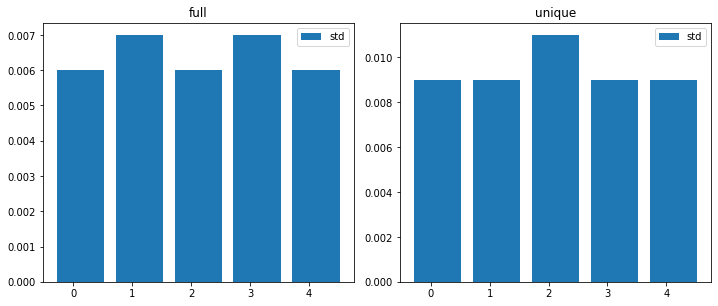

In [86]:
import FSDL.plate_recognizer.utils.plots as plots

titles = ["full", "unique"]
plots.plot_stats(stats, ["std"], titles)

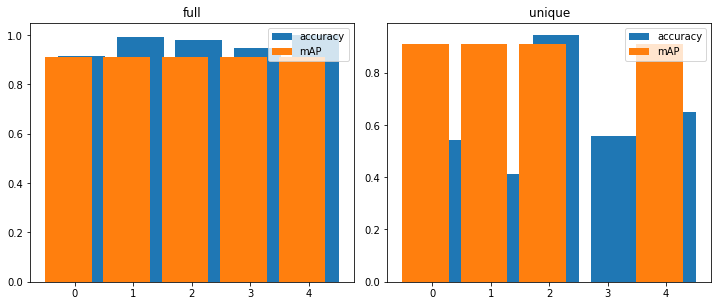

In [87]:
titles = ["full", "unique"]
plots.plot_stats(stats, ["accuracy", "mAP"], titles)

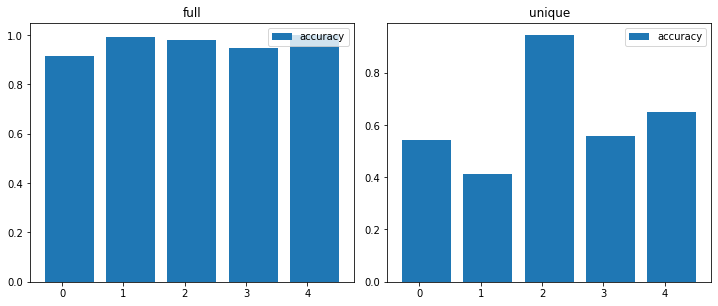

In [92]:
titles = ["full", "unique"]
plots.plot_stats(stats, ["accuracy"], titles)

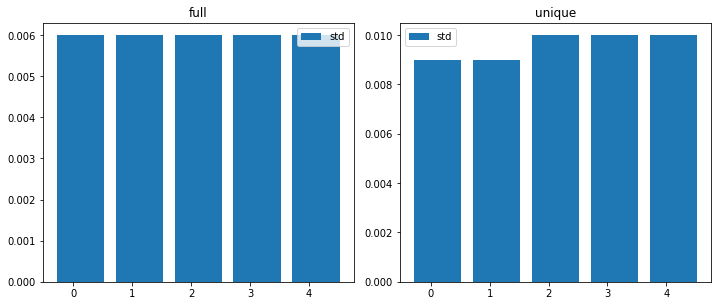

In [88]:
titles = ["full", "unique"]
plots.plot_stats(stats_uniq, ["std"], titles)

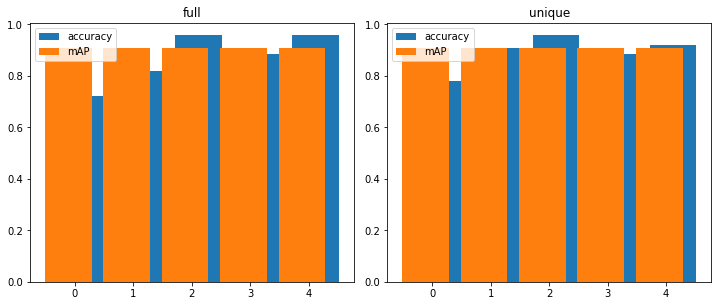

In [89]:
titles = ["full", "unique"]
plots.plot_stats(stats_uniq, ["accuracy", "mAP"], titles)

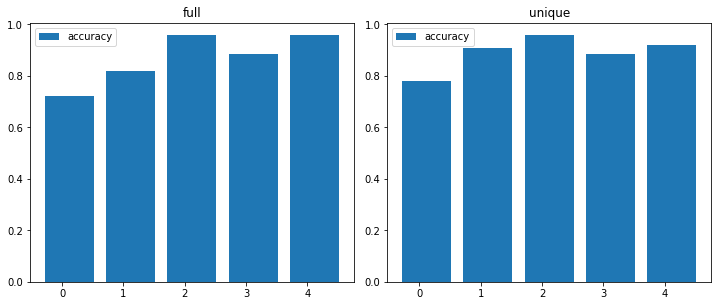

In [93]:
titles = ["full", "unique"]
plots.plot_stats(stats_uniq, ["accuracy"], titles)

1/1 [==============================] - 0s 68ms/step - loss: 7.9688e-05 - accuracy: 0.7222
2021-06-09 03:29:56,503 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91


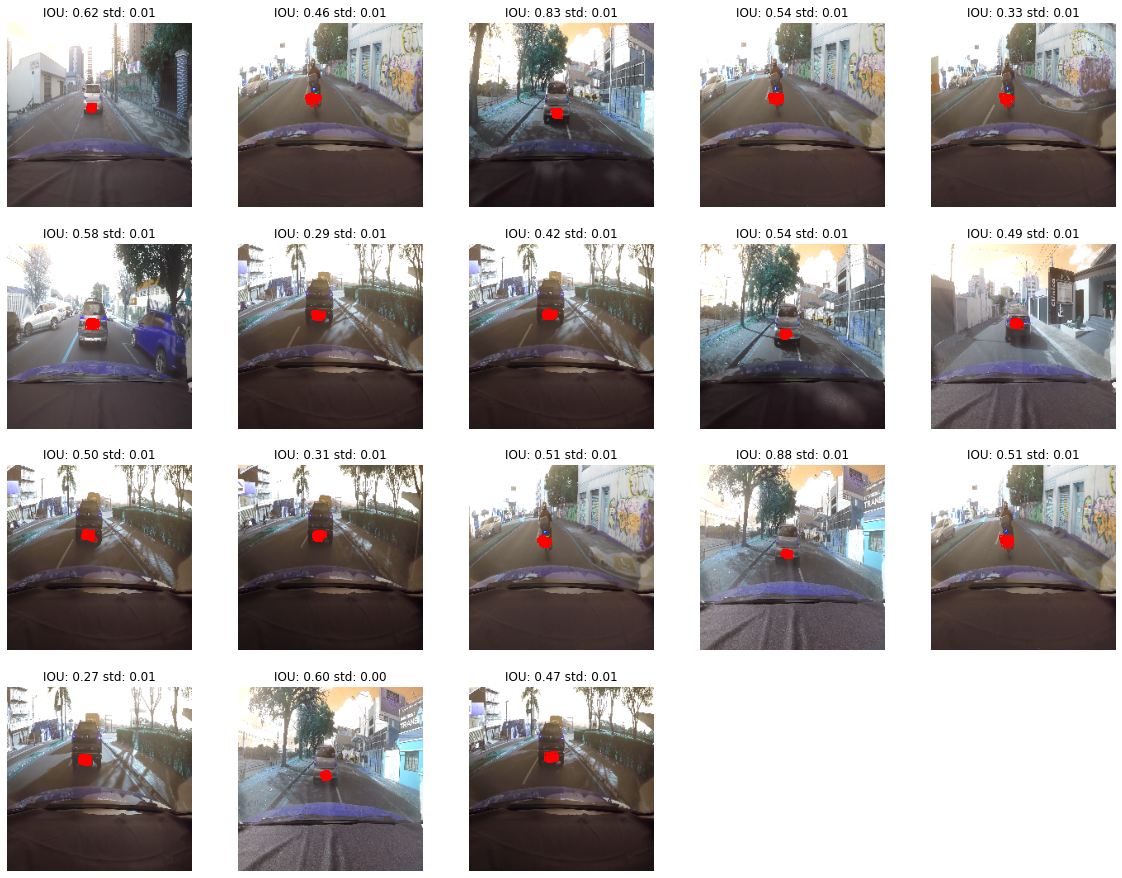

In [90]:
X_test_uniq, Y_test_uniq = ufpr_data_uniq.get_data(data_type=DataType.Test, cluster_id=0)

y_preds_uniq, m_ap_uniq, mstd_uniq, accuracy_uniq = \
  predictor.predict_on_cluster(model_cnn, X_test_uniq, Y_test_uniq, iterations=50)
plots.plot_predictions(X_test_uniq, Y_test_uniq, y_preds_uniq)

1/1 [==============================] - 0s 176ms/step - loss: 1.3936e-04 - accuracy: 0.9012
2021-06-09 03:30:13,712 - FSDL.plate_recognizer.training.metrics - INFO - metrics.py:65 - mAP:0.91


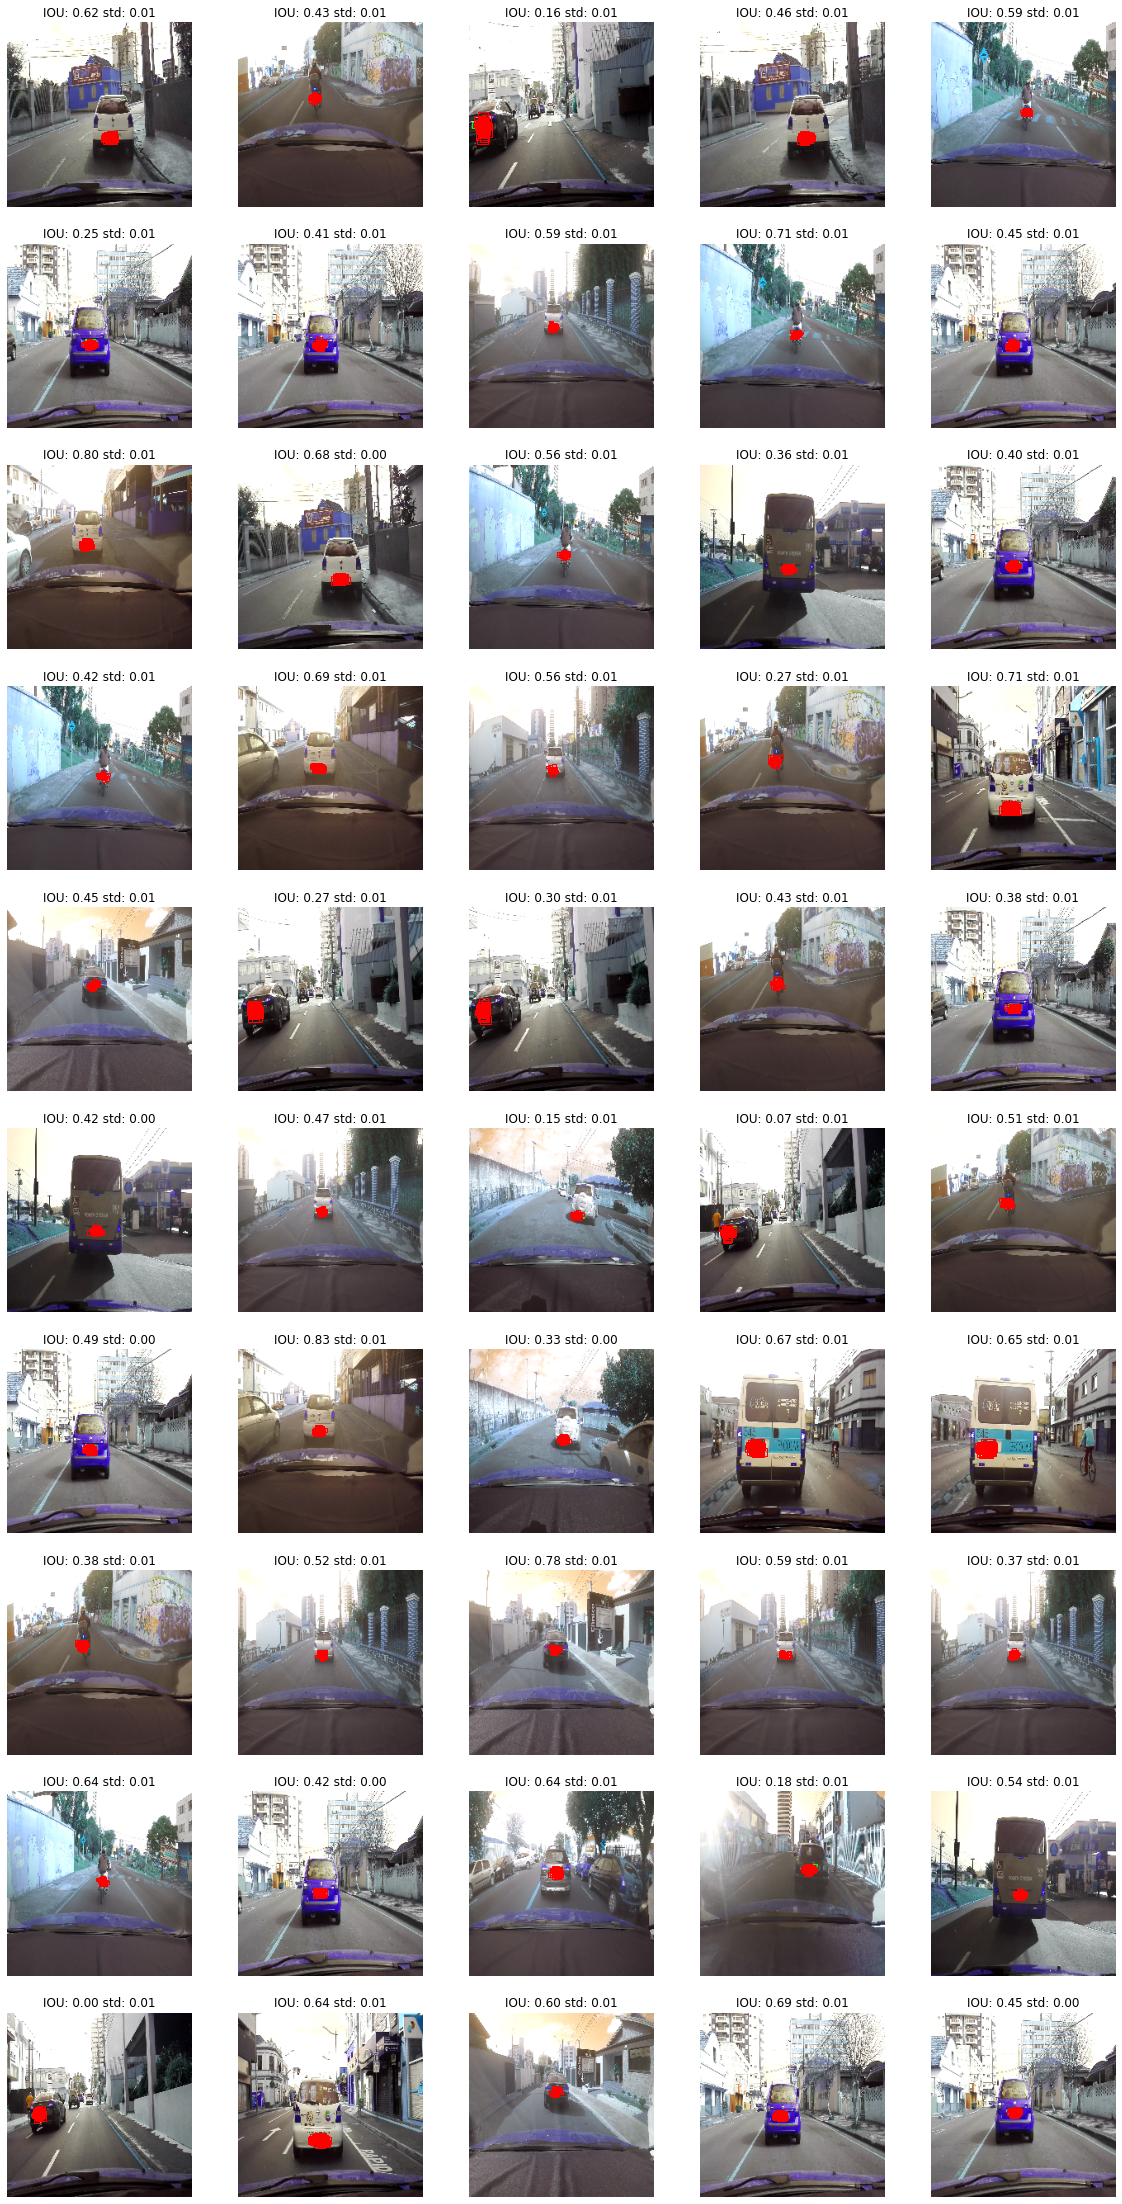

In [91]:
X_test, Y_test = ufpr_data.get_data(data_type=DataType.Test, cluster_id=0)

y_preds, m_ap, mstd, accuracy = \
  predictor.predict_on_cluster(model_cnn, X_test, Y_test, iterations=50)
plots.plot_predictions(X_test, Y_test, y_preds)